# Regression

In [3]:
import pandas as pd

pred_df = pd.read_csv('hourly_wages.csv', usecols = [1,2,3,4,5,6,7,8,9])
print(pred_df.info())

pred = pred_df.values
print(type(pred))
print(pred.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534 entries, 0 to 533
Data columns (total 9 columns):
union             534 non-null int64
education_yrs     534 non-null int64
experience_yrs    534 non-null int64
age               534 non-null int64
female            534 non-null int64
marr              534 non-null int64
south             534 non-null int64
manufacturing     534 non-null int64
construction      534 non-null int64
dtypes: int64(9)
memory usage: 37.6 KB
None
<class 'numpy.ndarray'>
(534, 9)


In [19]:
targ_df = pd.read_csv('hourly_wages.csv', usecols = [0])
print(targ_df.info())

targ_2d = targ_df.values
print(targ_2d.shape)

targ = targ_2d.flatten()
print(targ.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534 entries, 0 to 533
Data columns (total 1 columns):
wage_per_hour    534 non-null float64
dtypes: float64(1)
memory usage: 4.2 KB
None
(534, 1)
(534,)


In [16]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

In [28]:
# Predicting hourly wage for 107 individuals, based on various features
wage_model = Sequential()

# 2 hidden layers in the neural network
wage_model.add(Dense(50, activation = 'relu', input_shape = (pred.shape[1],)))
wage_model.add(Dense(32, activation = 'relu'))
wage_model.add(Dense(1))

wage_model.compile(optimizer = 'adam', loss = 'mean_squared_error')

wage_model_training = wage_model.fit(pred,targ,epochs = 25,validation_split = 0.2,callbacks = [EarlyStopping(patience = 2)])

Train on 427 samples, validate on 107 samples
Epoch 1/25
427/427 [==============================] - 0s - loss: 99.3142 - val_loss: 134.0491
Epoch 2/25
427/427 [==============================] - 0s - loss: 42.9791 - val_loss: 63.4161
Epoch 3/25
427/427 [==============================] - 0s - loss: 26.5199 - val_loss: 41.7102
Epoch 4/25
427/427 [==============================] - 0s - loss: 25.0077 - val_loss: 40.3780
Epoch 5/25
427/427 [==============================] - 0s - loss: 22.5444 - val_loss: 41.8741
Epoch 6/25
427/427 [==============================] - 0s - loss: 21.5528 - val_loss: 38.6591
Epoch 7/25
427/427 [==============================] - 0s - loss: 20.5880 - val_loss: 34.8185
Epoch 8/25
427/427 [==============================] - 0s - loss: 19.8385 - val_loss: 33.6518
Epoch 9/25
427/427 [==============================] - 0s - loss: 19.6189 - val_loss: 32.0824
Epoch 10/25
427/427 [==============================] - 0s - loss: 19.4434 - val_loss: 31.6428
Epoch 11/25
427/427 [=

In [27]:
wage_model_tanh = Sequential()

wage_model_tanh.add(Dense(50, activation = 'tanh', input_shape = (pred.shape[1],)))
wage_model_tanh.add(Dense(32, activation = 'tanh'))
wage_model_tanh.add(Dense(1))

wage_model_tanh.compile(optimizer = 'adam', loss = 'mean_squared_error')

wage_model_tanh_training = wage_model_tanh.fit(pred,targ,epochs = 25,validation_split = 0.2,callbacks = [EarlyStopping(patience = 2)])

Train on 427 samples, validate on 107 samples
Epoch 1/25
427/427 [==============================] - 0s - loss: 91.3520 - val_loss: 125.2185
Epoch 2/25
427/427 [==============================] - 0s - loss: 47.1174 - val_loss: 78.7076
Epoch 3/25
427/427 [==============================] - 0s - loss: 29.7122 - val_loss: 59.2450
Epoch 4/25
427/427 [==============================] - 0s - loss: 24.8264 - val_loss: 51.6995
Epoch 5/25
427/427 [==============================] - 0s - loss: 23.4132 - val_loss: 48.4148
Epoch 6/25
427/427 [==============================] - 0s - loss: 22.8873 - val_loss: 46.7851
Epoch 7/25
427/427 [==============================] - 0s - loss: 22.6495 - val_loss: 45.6460
Epoch 8/25
427/427 [==============================] - 0s - loss: 22.5149 - val_loss: 44.8924
Epoch 9/25
427/427 [==============================] - 0s - loss: 22.4043 - val_loss: 44.0620
Epoch 10/25
427/427 [==============================] - 0s - loss: 22.3411 - val_loss: 43.6599
Epoch 11/25
427/427 [=

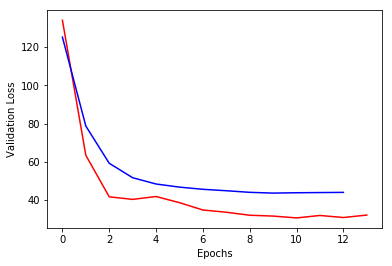

In [29]:
import matplotlib.pyplot as plt

plt.plot(wage_model_training.history['val_loss'], 'red')
plt.plot(wage_model_tanh_training.history['val_loss'], 'blue')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.show()

# Classification: digit recognition

In [49]:
from keras.utils import to_categorical

mnist_df = pd.read_csv('mnist_clean.csv', header = None)
mnist_df_pred = mnist_df.iloc[:,1:]
mnist_pred = mnist_df_pred.values
print(mnist_pred.shape)

mnist_targ = to_categorical(mnist_df[0])
print(type(mnist_targ))
print(mnist_targ.shape)

(2000, 784)
<class 'numpy.ndarray'>
(2000, 10)


In [72]:
digit_model = Sequential()

digit_model.add(Dense(50, activation = 'relu', input_shape = (mnist_pred.shape[1],)))
digit_model.add(Dense(50, activation = 'relu'))

digit_model.add(Dense(10, activation = 'softmax'))

digit_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

digit_model.fit(mnist_pred,mnist_targ,epochs = 50,callbacks = [EarlyStopping(patience = 3)],validation_split = 0.25)

Train on 1500 samples, validate on 500 samples
Epoch 1/50
1500/1500 [==============================] - 0s - loss: 11.5496 - acc: 0.2627 - val_loss: 10.6150 - val_acc: 0.3220
Epoch 2/50
1500/1500 [==============================] - 0s - loss: 9.7036 - acc: 0.3820 - val_loss: 9.6145 - val_acc: 0.3860
Epoch 3/50
1500/1500 [==============================] - 0s - loss: 8.7739 - acc: 0.4427 - val_loss: 8.3366 - val_acc: 0.4660
Epoch 4/50
1500/1500 [==============================] - 0s - loss: 7.9516 - acc: 0.4940 - val_loss: 8.1264 - val_acc: 0.4840
Epoch 5/50
1500/1500 [==============================] - 0s - loss: 7.2747 - acc: 0.5360 - val_loss: 6.9086 - val_acc: 0.5540
Epoch 6/50
1500/1500 [==============================] - 0s - loss: 6.9460 - acc: 0.5587 - val_loss: 7.5656 - val_acc: 0.5220
Epoch 7/50
1500/1500 [==============================] - 0s - loss: 6.7103 - acc: 0.5767 - val_loss: 6.9233 - val_acc: 0.5560
Epoch 8/50
1500/1500 [==============================] - 0s - loss: 6.3233 - 

In [62]:
mnist_pred_train = mnist_df.iloc[:1600,1:].values
print(mnist_pred_train.shape)
mnist_pred_test = mnist_df.iloc[1600:,1:].values
print(mnist_pred_test.shape)

mnist_df_train = mnist_df.iloc[:1600,:]
mnist_targ_train = to_categorical(mnist_df_train[0])
print(mnist_targ_train.shape)

(1600, 784)
(400, 784)
(1600, 10)


In [73]:
digit_model_2 = Sequential()

digit_model_2.add(Dense(50, activation = 'relu', input_shape = (mnist_pred.shape[1],)))
digit_model_2.add(Dense(50, activation = 'relu'))

digit_model_2.add(Dense(10, activation = 'softmax'))

digit_model_2.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

digit_model_2.fit(mnist_pred_train,mnist_targ_train,verbose = False)

In [74]:
digit_preds = digit_model_2.predict(mnist_pred_test)
digit_preds_df = pd.DataFrame(digit_preds, index = range(1601,2001), columns = ['prob_0','prob_1','prob_2','prob_3','prob_4','prob_5','prob_6','prob_7','prob_8','prob_9'])
print(digit_preds_df.tail(50))

            prob_0        prob_1  prob_2  prob_3        prob_4  prob_5  \
1951  0.000000e+00  0.000000e+00     0.0     0.0  0.000000e+00     0.0   
1952  0.000000e+00  0.000000e+00     0.0     0.0  0.000000e+00     0.0   
1953  0.000000e+00  0.000000e+00     0.0     0.0  0.000000e+00     0.0   
1954  0.000000e+00  0.000000e+00     0.0     0.0  0.000000e+00     0.0   
1955  1.492544e-16  0.000000e+00     0.0     0.0  4.705659e-25     0.0   
1956  3.447550e-14  0.000000e+00     0.0     0.0  0.000000e+00     0.0   
1957  0.000000e+00  1.000000e+00     0.0     0.0  0.000000e+00     0.0   
1958  0.000000e+00  0.000000e+00     0.0     0.0  0.000000e+00     0.0   
1959  0.000000e+00  0.000000e+00     0.0     0.0  1.000000e+00     0.0   
1960  0.000000e+00  0.000000e+00     0.0     0.0  0.000000e+00     0.0   
1961  0.000000e+00  0.000000e+00     0.0     0.0  1.000000e+00     0.0   
1962  0.000000e+00  0.000000e+00     0.0     0.0  0.000000e+00     0.0   
1963  0.000000e+00  3.719021e-09     0

# Neural network plotting

In [91]:
def draw_neural_net(ax, left, right, bottom, top, layer_sizes):
    '''
    Draw a neural network cartoon using matplotilb.
    
    :usage:
        >>> fig = plt.figure(figsize=(12, 12))
        >>> draw_neural_net(fig.gca(), .1, .9, .1, .9, [4, 7, 2])
    
    :parameters:
        - ax : matplotlib.axes.AxesSubplot
            The axes on which to plot the cartoon (get e.g. by plt.gca())
        - left : float
            The center of the leftmost node(s) will be placed here
        - right : float
            The center of the rightmost node(s) will be placed here
        - bottom : float
            The center of the bottommost node(s) will be placed here
        - top : float
            The center of the topmost node(s) will be placed here
        - layer_sizes : list of int
            List of layer sizes, including input and output dimensionality
    '''
    n_layers = len(layer_sizes)
    v_spacing = (top - bottom)/float(max(layer_sizes))
    h_spacing = (right - left)/float(len(layer_sizes) - 1)
    # Nodes
    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing*(layer_size - 1)/2. + (top + bottom)/2.
        for m in range(layer_size):
            circle = plt.Circle((n*h_spacing + left, layer_top - m*v_spacing), v_spacing/4.,
                                color='w', ec='k', zorder=4) # height = 1
            ax.add_artist(circle)
    # Edges (i.e., synapse connections)
    for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing*(layer_size_a - 1)/2. + (top + bottom)/2.
        layer_top_b = v_spacing*(layer_size_b - 1)/2. + (top + bottom)/2.
        for m in range(layer_size_a):
            for o in range(layer_size_b):
                line = plt.Line2D([n*h_spacing + left, (n + 1)*h_spacing + left],
                                  [layer_top_a - m*v_spacing, layer_top_b - o*v_spacing], c='b')
                ax.add_artist(line)

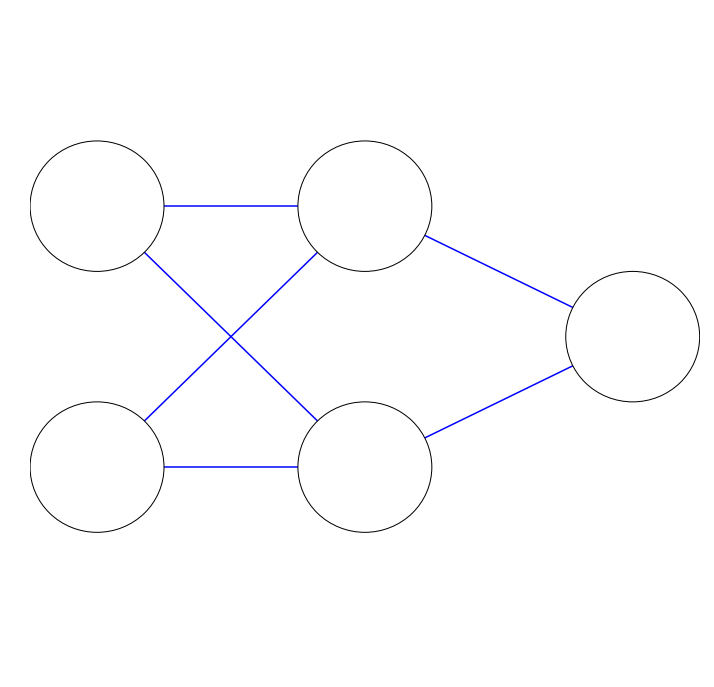

In [96]:
fig = plt.figure(figsize=(12, 12))
ax = fig.gca()
ax.axis('off')
draw_neural_net(ax, .1, .9, .1, .9, [2, 2, 1])
fig.savefig('nn.png')
plt.show()